In [34]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import scipy.stats as s

In [35]:
def ping_analysis(fileName, save=False):
    df = pd.read_csv(f"./dataWin2/{fileName}_ping.csv", delimiter = ",")
    df['ms'] = df['ms'].apply(lambda x : str(-10) if x == -1 else x)
    df['ms'] = pd.to_numeric(df['ms'])
    ping_spikes = df[df['ms'] > 50]['ms'].count()
    tries = df['ms'].count()
    
    print("Meranie od " + str(df.iloc[0]['date']) + " : " + str(df.iloc[0]['time']))
    print("Meranie do " + str(df.iloc[-1]['date']) + " : " + str(df.iloc[-1]['time']))
    
    print("Ping spike nastava kazdych : "+str(round((tries/ping_spikes),2))+" sekund.")
    print("Priemerny ping : "+str(round(df['ms'].mean()))+" ms.")
    
    lost_pings = df[df['ms'] == -10]['ms'].count()
    
    print("Pocet vypadkov : "+str(lost_pings))
    plt.figure(figsize=(20,20))
    plt.xlabel("Opakovanie")
    plt.ylabel("Odovzna v ms")
    plt.yticks(range(0,int(df['ms'].max()+50),50))
    plt.plot(df.index, df['ms'],label='Ping')
    plt.plot((0, df.index.max()), (0, 0),marker='o',label='0 ms')
    plt.plot((0, df.index.max()), (df['ms'].mean(), df['ms'].mean()),marker='o', label='Average ms')
    plt.legend(framealpha=1, frameon=True);
    if save:
        plt.savefig(f'{fileName}.png')
    
    plt.show()

Meranie od 08-02-2021 : 15:01:34
Meranie do 08-02-2021 : 22:37:00
Ping spike nastava kazdych : 42.81 sekund.
Priemerny ping : 16 ms.
Pocet vypadkov : 163


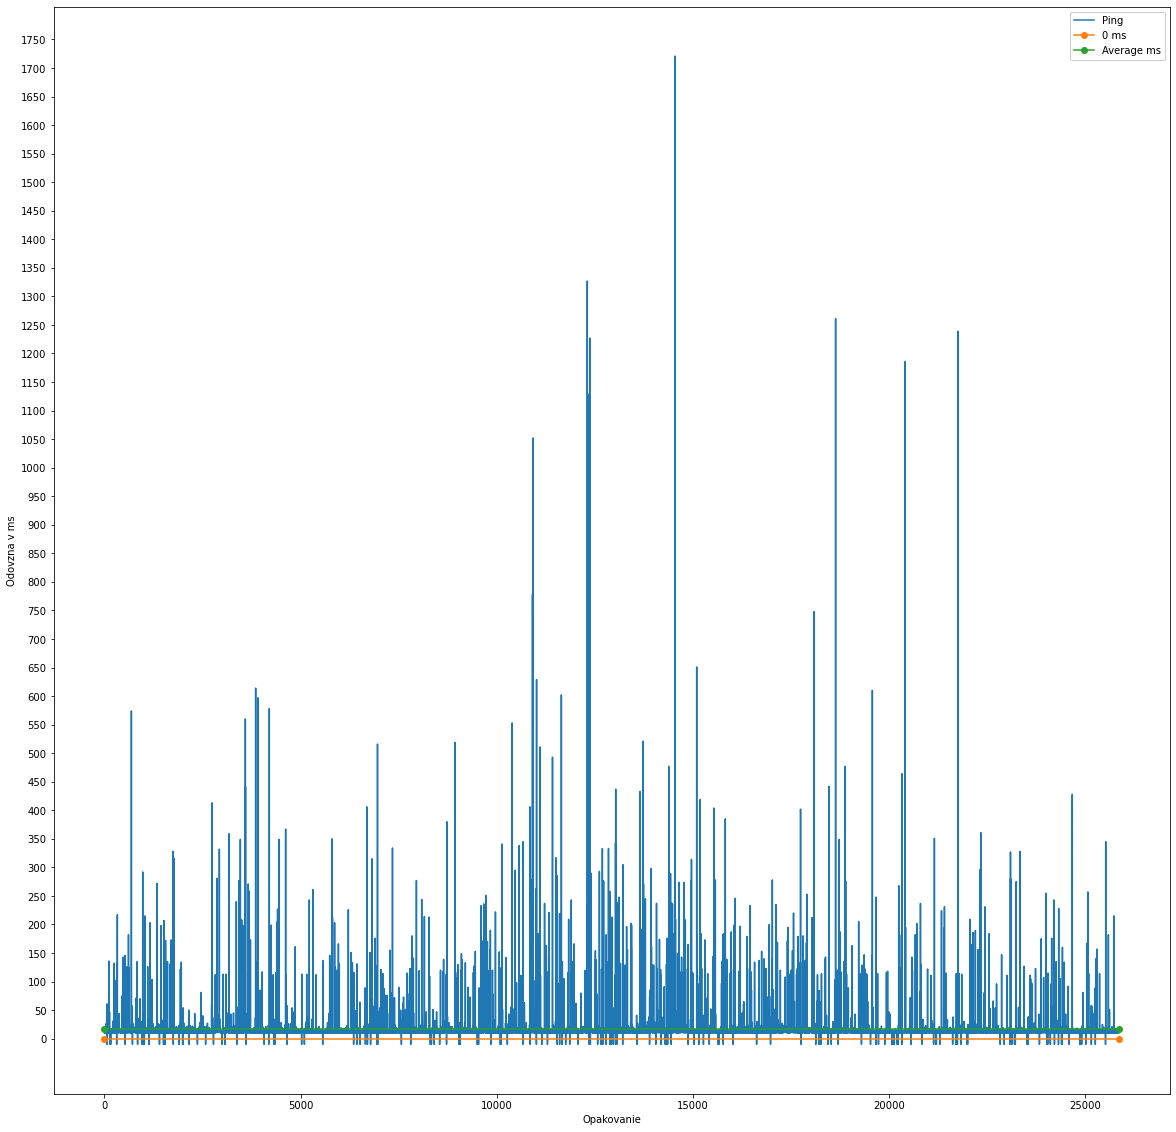

In [36]:
ping_analysis("google.sk",save=True)

Meranie od 08-02-2021 : 15:01:58
Meranie do 08-02-2021 : 22:35:56
Ping spike nastava kazdych : 45.86 sekund.
Priemerny ping : 16 ms.
Pocet vypadkov : 177


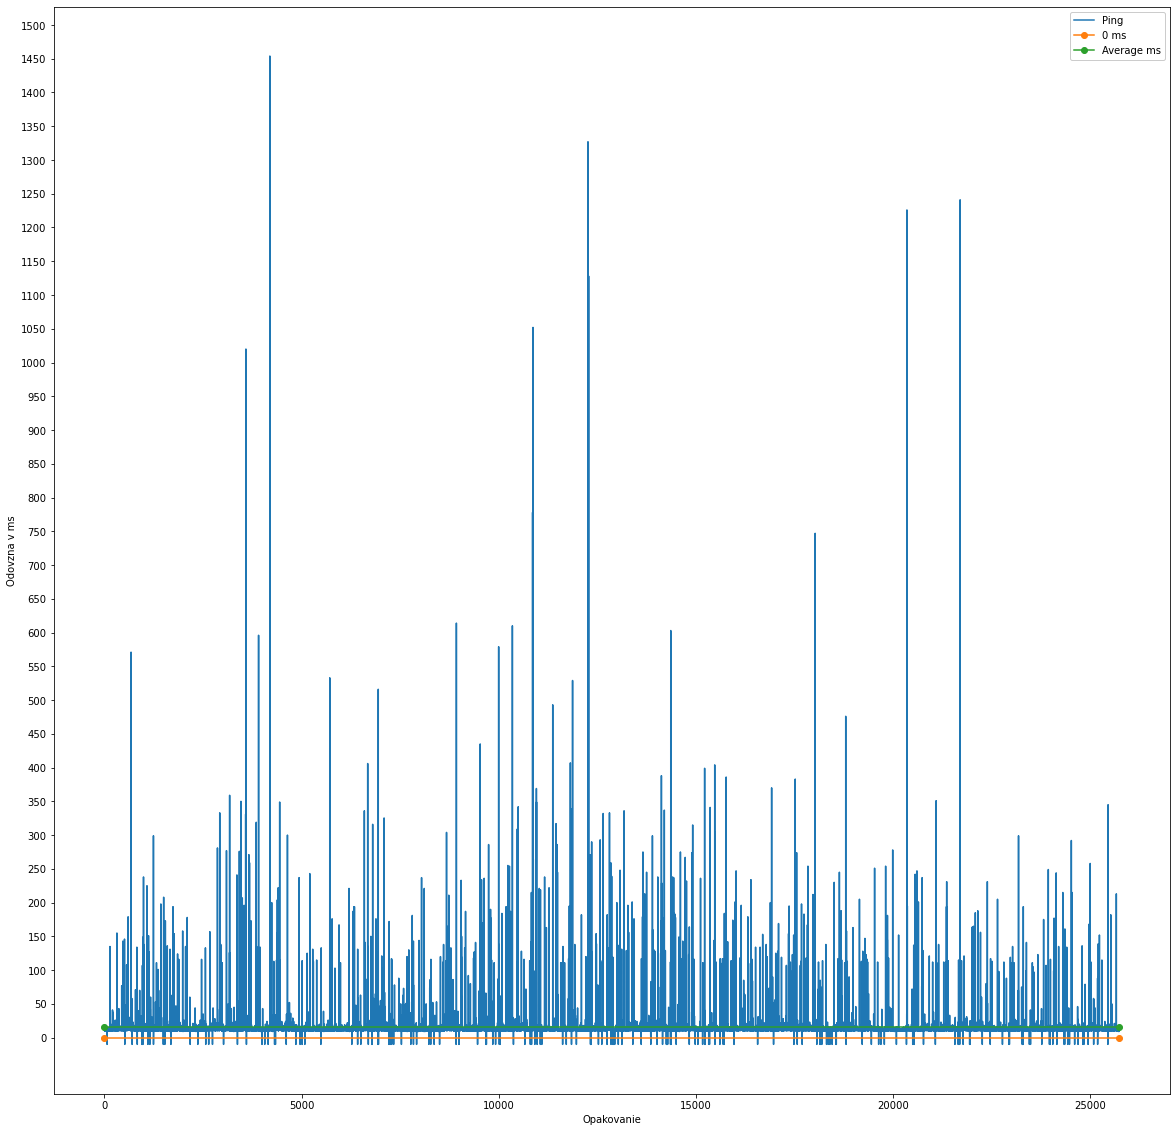

In [37]:
ping_analysis("77.247.224.50",save=True)